# План решения

1. Определим самые популярные разделы и материалы
2. DAU, WAU, MAU
3. Lifetime
4. Retention
5. Custom metrics

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [65]:
df = pd.read_csv('https://gist.githubusercontent.com/Vs8th/cef470d84475f4f14025089f4068cd73/raw/events.csv')

In [66]:
df

,visit_date,URL_visited,user_id,user_reg_date
0,01.02.2018,https://dasreda.ru/learn/courses/yandeksdirekt...,2123,01.02.2018
1,01.02.2018,https://dasreda.ru/learn/courses/odnoklassniki...,2123,01.02.2018
2,01.02.2018,https://dasreda.ru/learn/courses/yandeksauditorii,2123,01.02.2018
3,01.02.2018,https://dasreda.ru/learn/courses/yandeksauditorii,2123,01.02.2018
4,01.02.2018,https://dasreda.ru/learn/courses/yandeksauditorii,2123,01.02.2018
...,...,...,...,...
52275,05.04.2018,https://dasreda.ru/learn/blog/article/254,35247,05.04.2018
52276,05.04.2018,https://dasreda.ru/learn/blog/article/110,35247,05.04.2018
52277,05.04.2018,https://dasreda.ru/learn,35247,05.04.2018
52278,05.04.2018,https://dasreda.ru/learn/trajectory/shina,35247,05.04.2018


In [67]:
df.dtypes

visit_date       object
URL_visited      object
user_id           int64
user_reg_date    object
dtype: object

In [68]:
#переводим в формат даты
df['user_reg_date'] = pd.to_datetime(df['user_reg_date'], format='%d.%m.%Y')
df['visit_date'] = pd.to_datetime(df['visit_date'], format='%d.%m.%Y')

In [69]:
df

,visit_date,URL_visited,user_id,user_reg_date
0,2018-02-01,https://dasreda.ru/learn/courses/yandeksdirekt...,2123,2018-02-01
1,2018-02-01,https://dasreda.ru/learn/courses/odnoklassniki...,2123,2018-02-01
2,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,2123,2018-02-01
3,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,2123,2018-02-01
4,2018-02-01,https://dasreda.ru/learn/courses/yandeksauditorii,2123,2018-02-01
...,...,...,...,...
52275,2018-04-05,https://dasreda.ru/learn/blog/article/254,35247,2018-04-05
52276,2018-04-05,https://dasreda.ru/learn/blog/article/110,35247,2018-04-05
52277,2018-04-05,https://dasreda.ru/learn,35247,2018-04-05
52278,2018-04-05,https://dasreda.ru/learn/trajectory/shina,35247,2018-04-05


In [70]:
#извлекаем неделю/месяц регистрации и посещения
df['reg_month'] = df['user_reg_date'].dt.month
df['vis_month'] = df['visit_date'].dt.month
df['reg_week'] = df['user_reg_date'].dt.isocalendar().week.astype('int32')
df['vis_week'] = df['visit_date'].dt.isocalendar().week.astype('int32')

In [71]:
#найдем максимальную и минимальную неделю
df['vis_week'].max(), df['vis_week'].min()

(14, 5)

In [72]:
#посмотрим сколько дней в 5 неделе
df['visit_date'][df['vis_week'] == 5].nunique()

4

In [73]:
#посмотрим сколько дней в 14 неделе
df['visit_date'][df['vis_week'] == 14].nunique()

4

в 5 и 14 неделе только 4 дня, исключим эти недели.

In [74]:
df.query('reg_week != 5 & reg_week != 14', inplace = True)
df.query('vis_week != 14', inplace = True)

In [75]:
df.query('vis_month == 4')['visit_date'].unique()

array(['2018-04-01T00:00:00.000000000'], dtype='datetime64[ns]')

В марте остался один день, оставляем его. Проверим остальные недели на пропущенные дни

In [76]:
check_days = df.groupby(['vis_month','visit_date'], as_index = False)\
                        .agg(count_days = ('visit_date', 'nunique'))

#считаем разницу между датами
check_days['delta'] = check_days['visit_date'].diff().dt.days

In [77]:
check_days[check_days['delta'] > 1]

,vis_month,visit_date,count_days,delta


Пропущенных дат нет

In [78]:
#вычисляем разницу недель для когортного анализа
df['diff_week'] = df['vis_week'] - df['reg_week']
#вычисляем последнюю неделю посещения пользователя, относительно 'diff_week'
df['last_diff_week'] = df.groupby('user_id')['diff_week'].transform('max')

In [79]:
df

,visit_date,URL_visited,user_id,user_reg_date,reg_month,vis_month,reg_week,vis_week,diff_week,last_diff_week
4853,2018-02-05,https://dasreda.ru/learn/blog/article/284,5925,2018-02-05,2,2,6,6,0,0
4854,2018-02-05,https://dasreda.ru/learn/blog/article/128,5925,2018-02-05,2,2,6,6,0,0
4855,2018-02-05,https://dasreda.ru/learn,5925,2018-02-05,2,2,6,6,0,0
4856,2018-02-05,https://dasreda.ru/learn/video/231,5928,2018-02-05,2,2,6,6,0,0
4857,2018-02-05,https://dasreda.ru/learn/blog/article/152,5932,2018-02-05,2,2,6,6,0,0
...,...,...,...,...,...,...,...,...,...,...
44452,2018-04-01,https://dasreda.ru/learn/courses/psihologiya-u...,29617,2018-04-01,4,4,13,13,0,0
44453,2018-04-01,https://dasreda.ru/learn/courses/psihologiya-u...,29617,2018-04-01,4,4,13,13,0,0
44454,2018-04-01,https://dasreda.ru/learn/courses/psihologiya-u...,29617,2018-04-01,4,4,13,13,0,0
44455,2018-04-01,https://dasreda.ru/learn/courses/psihologiya-u...,29617,2018-04-01,4,4,13,13,0,0


# Определяем самые популярные разделы и форматы

Сначала опреледим, главная ли это страница раздела или нет

In [80]:
#список веб-страниц, которые являются главными в разделе
main_list = ['https://dasreda.ru/learn', 'https://dasreda.ru/learn/do', \
             'https://dasreda.ru/learn/', 'https://dasreda.ru/learn/trajectories', \
            'https://dasreda.ru/learn/blog', 'https://dasreda.ru/learn/courses', \
            'https://dasreda.ru/learn/videos', 'https://dasreda.ru/learn/trajectory']

In [81]:
def main_df(df):
    '''Определяем тип страницы, главная ли она или нет'''
    for i in main_list:
        if i == df['URL_visited']:
            return 'main'
    return 'other'

In [82]:
df['page_type'] = df.apply(main_df, axis = 1)

In [83]:
df

,visit_date,URL_visited,user_id,user_reg_date,reg_month,vis_month,reg_week,vis_week,diff_week,last_diff_week,page_type
4853,2018-02-05,https://dasreda.ru/learn/blog/article/284,5925,2018-02-05,2,2,6,6,0,0,other
4854,2018-02-05,https://dasreda.ru/learn/blog/article/128,5925,2018-02-05,2,2,6,6,0,0,other
4855,2018-02-05,https://dasreda.ru/learn,5925,2018-02-05,2,2,6,6,0,0,main
4856,2018-02-05,https://dasreda.ru/learn/video/231,5928,2018-02-05,2,2,6,6,0,0,other
4857,2018-02-05,https://dasreda.ru/learn/blog/article/152,5932,2018-02-05,2,2,6,6,0,0,other
...,...,...,...,...,...,...,...,...,...,...,...
44452,2018-04-01,https://dasreda.ru/learn/courses/psihologiya-u...,29617,2018-04-01,4,4,13,13,0,0,other
44453,2018-04-01,https://dasreda.ru/learn/courses/psihologiya-u...,29617,2018-04-01,4,4,13,13,0,0,other
44454,2018-04-01,https://dasreda.ru/learn/courses/psihologiya-u...,29617,2018-04-01,4,4,13,13,0,0,other
44455,2018-04-01,https://dasreda.ru/learn/courses/psihologiya-u...,29617,2018-04-01,4,4,13,13,0,0,other


In [84]:
#список разделов
cat_list = ['blog', 'read' ,'video', 'course', 'trajectory', 'do']
def cat_df(df):
    '''Присваивание категории веб-странице'''
    for i in cat_list:
        if i in df['URL_visited']:
            return i
    return 'start'

In [85]:
numb_of_cat = len(cat_list)

In [86]:
df['category'] = df.apply(cat_df, axis = 1)
#дополянем категорию 'trajectory'
df.loc[df['URL_visited'].str.contains('trajectories', case=False), 'category'] = 'trajectory'

In [87]:
#Проверяем чтобы в 'start' не попали другие категории, кроме главной страницы
df['URL_visited'][df['category'] == 'start'].unique()

array(['https://dasreda.ru/learn', 'https://dasreda.ru/learn/'],
      dtype=object)

In [88]:
#Найдем самый популярный раздел
df_pop = df.query("category != 'start'").groupby(['category'], as_index = False) \
                    .agg(count_event = ('category', 'count')) \
                    .sort_values(['count_event'], ascending = False)

In [89]:
#присаваиваем цвет для каждой категории
color_map={
                "course": "#636EFA",
                "video": "#EF553B",
                "blog": "#00CC96",
                "trajectory": "#AB63FA",
                "do": "#FFA15A"}

In [90]:
fig = px.bar(df_pop, x='category', y='count_event', color = 'category', 
                                     color_discrete_map = color_map )
fig.update_layout(title_text='Популярность категорий по посещениям', title_x=0.5, 
                  yaxis_title = 'События', xaxis_title = 'Категория')
fig.show()

Если считать по посещениям, то курс, видео, блог просматривют чаще всего. Разделы trajectory, do и read сильно отстают

Теперь посчитаем популярность по пользователям

In [91]:
df_pop_u = df.query("category != 'start'").groupby(['category'], as_index = False) \
                    .agg(count_users = ('user_id', 'nunique')) \
                    .sort_values(['count_users'], ascending = False)

fig = px.bar(df_pop_u, x='category', y='count_users', color = 'category', color_discrete_map = color_map)

fig.update_layout(title_text='Популярность категорий по пользователям', title_x=0.5, yaxis_title = 'Уникальные пользователи', 
                  xaxis_title = 'Категория')
fig.show()

Больше всего людей посмотрели раздел video, blog, course 

**Можно сделать вывод, что это наши основные разделы**

Выделим топ 3 материалов в каждом разделе

In [92]:
#чтобы отсечь главные страницы без материалов, будем искать только в other
df.query("page_type == 'other'").groupby(['category', 'page_type', 'URL_visited'], as_index = False) \
                    .agg(count = ('URL_visited', 'count')) \
                    .sort_values(['category','count', 'page_type'], ascending = [True, False, True]) \
                    .groupby('category').head(3)

,category,page_type,URL_visited,count
115,blog,other,https://dasreda.ru/learn/blog/article/259,697
15,blog,other,https://dasreda.ru/learn/blog/article/128,472
126,blog,other,https://dasreda.ru/learn/blog/article/281,418
330,course,other,https://dasreda.ru/learn/courses/instagram-voz...,389
220,course,other,https://dasreda.ru/learn/courses/biznes-klass,350
740,course,other,https://dasreda.ru/learn/courses/put-predprini...,257
1007,read,other,https://dasreda.ru/learn/category/read/inspira...,27
1012,read,other,https://dasreda.ru/learn/category/read/start,14
998,read,other,https://dasreda.ru/learn/category/read/29,11
1016,trajectory,other,https://dasreda.ru/learn/trajectory/beauty,363


# DAU, WAU, MAU

<AxesSubplot:title={'center':'DAU'}, xlabel='День посещения', ylabel='Уникальные пользователи'>

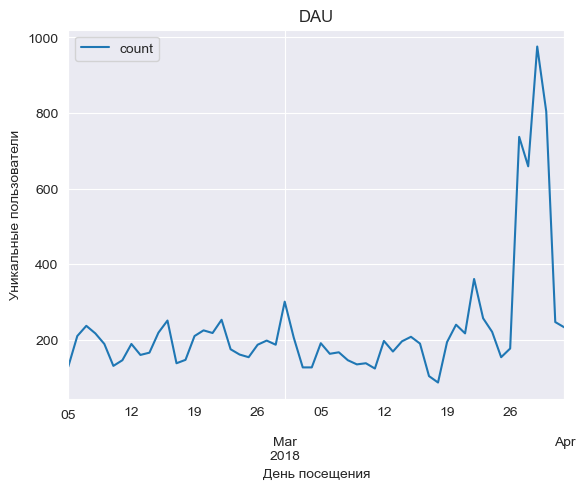

In [93]:
df_dau = df.groupby(['visit_date'], as_index = False) \
                    .agg(count = ('user_id', 'nunique'))

df_dau.plot(x = 'visit_date', y = 'count', title = 'DAU', 
            xlabel = 'День посещения', ylabel = 'Уникальные пользователи')

Посмотрим DAU с сегментацией по новым и старым пользователям

<AxesSubplot:title={'center':'DAU c сегментацией по типу пользователя'}, xlabel='День посещения', ylabel='Уникальные пользователи'>

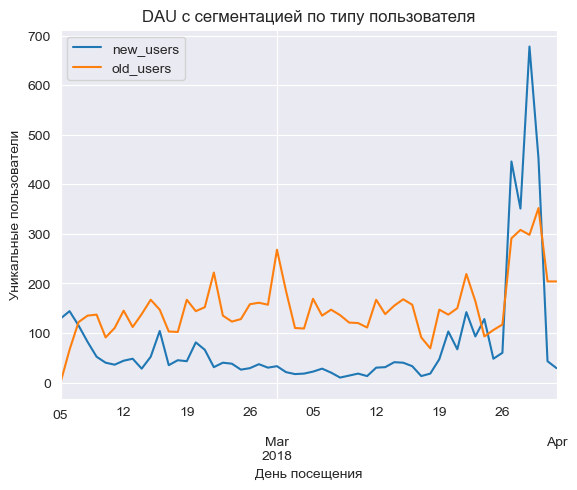

In [94]:
#считаем DAU новых пользователей
df_dau_new = df.query("visit_date == user_reg_date") \
                .groupby('visit_date', as_index = False) \
                .agg(new_users = ('user_id','nunique'))

#считаем DAU старых пользователей пользователей
df_dau_old = df.query("visit_date > user_reg_date") \
                .groupby('visit_date', as_index = False) \
                .agg(old_users = ('user_id','nunique'))

#объединяем данные по старым и новым пользователям
df_dau_u = df_dau_new.merge(df_dau_old, how = 'outer', on = 'visit_date').fillna(0)

df_dau_u['old_users'] = df_dau_u['old_users'].astype('Int64')

df_dau_u.plot(x= 'visit_date', xlabel = 'День посещения', ylabel = 'Уникальные пользователи', 
              title = 'DAU c сегментацией по типу пользователя')

В конце марта был большой наплыв пользователей. Обычно старых пользователей в день заходят больше чем новых.

Посмотрим на WAU

<AxesSubplot:title={'center':'WAU'}, xlabel='Неделя посещения', ylabel='Уникальные пользователи'>

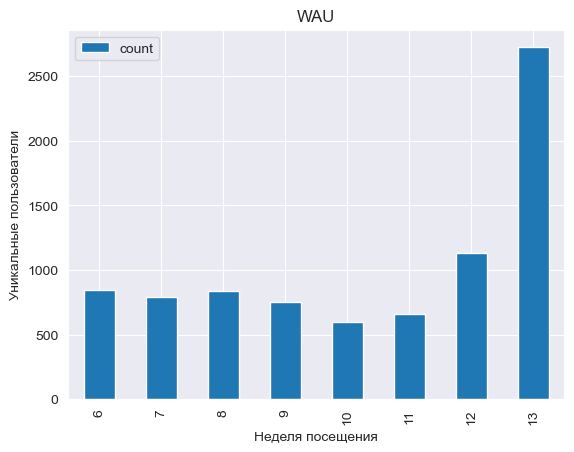

In [95]:
df_wau = df.groupby(['vis_week'], as_index = False) \
                    .agg(count = ('user_id', 'nunique'))
df_wau.plot(x = 'vis_week', y = 'count', kind = 'bar', title = 'WAU', 
            xlabel = 'Неделя посещения', ylabel = 'Уникальные пользователи')

Заметный рост начался с 12 недели, а на 13 недели был достигнут пик. Посмотрим какие это были пользователи

In [96]:
#считаем wau с разбивкой на неделю посещения и неделю регистрации
df_wau_u = df.groupby(['vis_week', 'reg_week'], as_index = False) \
    .agg(count_user =("user_id","nunique"))

#определяем тип пользователя
df_wau_u['user_type'] = df_wau_u.apply(lambda x: "new_users" if x['vis_week'] == x['reg_week'] else "old_users", axis = 1)

#суммируем новых и старых пользователей
df_wau_u = df_wau_u.groupby(['vis_week','user_type'], as_index = False) \
    .agg(count_user =("count_user","sum"))

df_wau_u['share, %'] = round( 
                            df_wau_u['count_user'] / df_wau_u.groupby(['vis_week'])['count_user'].transform('sum')
                            , 2)
#Доля пользователей в wau
df_wau_u['share, %'] = df_wau_u['share, %'].map('{:.0%}'.format)

In [97]:
fig = px.bar(df_wau_u, x="vis_week", y="count_user", color="user_type", barmode = 'group')
fig.update_layout(bargap=0.30, title_text='WAU с сегментацией по типу пользователя и разбивкой по группам', title_x=0.5, 
                  xaxis_title='Неделя посещения', yaxis_title = 'Уникальные пользователи')
fig.show()

Старые пользователи стабильно заходят в приложение, тем временем кол-во новых сначала падает, а на 12 неделе резко растёт

In [98]:
fig = px.bar(df_wau_u, x="vis_week", y="count_user", color="user_type", text = 'share, %')

fig.update_layout(bargap=0.30, title_text='WAU с сегментацией по типу пользователя', title_x=0.5,
                  xaxis_title='Неделя посещения', yaxis_title = 'Уникальные пользователи')
fig.show()

Рост 12 и 13 недели обусловлен в основном притоком новых пользователей. На 9, 10, 11 старых пользователей было более 60%.

Теперь взгялнем на MAU

<AxesSubplot:title={'center':'MAU'}, xlabel='Номер месяца посещения', ylabel='Уникальные пользователи'>

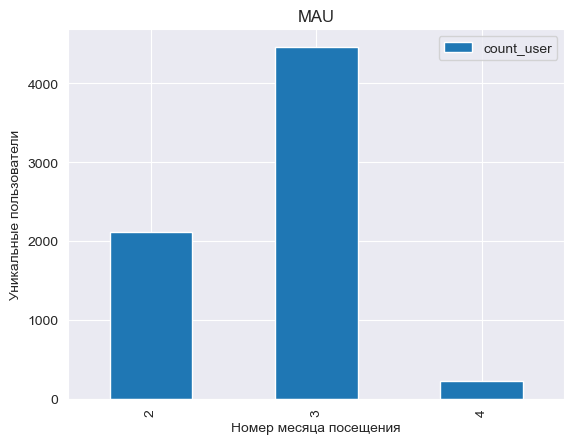

In [99]:
df_mau = df.groupby('vis_month', as_index = False) \
                .agg(count_user = ('user_id','nunique'))

df_mau.plot(x = 'vis_month', y = 'count_user', kind = 'bar', xlabel = 'Номер месяца посещения', title = 'MAU',
           ylabel = 'Уникальные пользователи')

MAU растёт, В Марте самое большое количество активных пользователей. 

Разделим пользователей на новых и старых.

In [100]:
#считаем MAU с разбивкой на неделю посещения и неделю регистрации
df_mau_u = df.groupby(['vis_month', 'reg_month'], as_index = False) \
    .agg(count_user =("user_id","nunique"))

#Доля когорты в MAU
df_mau_u['Share, %'] = round( 
                df_mau_u['count_user'] / df_mau_u.groupby(['vis_month'])['count_user'].transform('sum') *100
                            , 2)

#опредялем тип пользователей
df_mau_u['Users'] = df_mau_u.apply(lambda x: "new_users" if x['vis_month'] == x['reg_month'] else "old_users", axis = 1)

In [101]:
df_mau_u

,vis_month,reg_month,count_user,"Share, %",Users
0,2,2,2112,100.00,new_users
1,3,2,935,20.98,old_users
2,3,3,3522,79.02,new_users
3,4,2,73,31.33,old_users
4,4,3,131,56.22,old_users
5,4,4,29,12.45,new_users


In [102]:
fig = px.histogram(df_mau_u, x="vis_month", y="count_user", color="Users", text_auto=True, nbins = 3)

fig.update_layout(bargap=0.30, title_text='MAU с сегментацией по типу пользователя', title_x=0.5, 
                  xaxis_title='Номер месяца посещения', yaxis_title = 'Уникальные пользователи')

fig.show()

MAU в Марте увеличился в 2 раза, благодаря тому что новых пользователей стало в 1,5 раза больше и также вернулась некоторая часть старых. В 4 месяце всего один день, поэтому MAU в нем маленькое.

На 10 неделю WAU самое маленькое, скорее всего это связано с тем, что на той неделе было 2 праздничных дня (8 и 9 марта).
Рост 12 и 13 недели обусловлен в основном притоком новых пользователей. В 12 неделю пришло почти в 3 раза больше новых пользователей, по сравнению с предыдущей неделей, а в 13 неделю пришло аж в 7 раз больше новых пользователй, по сравнению с предыдущей неделей.


Гипотезы: 
  <br > **В Марте(на 13 неделю) была проведена рекламаная компания.**
  
Чтобы проверить эту гипотезу необходимы данные о источниках трафика и рекламных компаниях

# Lifetime

In [103]:
cum_ret = df.groupby(['diff_week'], as_index = False) \
                .agg(count = ('user_id', 'nunique'))

#считаем кол-во пользователей в 0 неделю для ретеншн
ret_0_week = cum_ret['count'].iloc[0]

cum_ret['retention'] = round(cum_ret['count'] / ret_0_week, 2)

In [104]:
cum_ret

,diff_week,count,retention
0,0,5201,1.00
1,1,1098,0.21
2,2,644,0.12
3,3,498,0.10
4,4,334,0.06
5,5,276,0.05
6,6,177,0.03
7,7,105,0.02


In [105]:
#Рассчитаем общий lifetime
cum_ret['lifetime'] = cum_ret['retention'].cumsum().round(2)
cum_ret

,diff_week,count,retention,lifetime
0,0,5201,1.00,1.00
1,1,1098,0.21,1.21
2,2,644,0.12,1.33
3,3,498,0.10,1.43
4,4,334,0.06,1.49
5,5,276,0.05,1.54
6,6,177,0.03,1.57
7,7,105,0.02,1.59


In [106]:
print(f'Средний Lifetime равен {round(cum_ret.retention.sum() , 1)}')

Средний Lifetime равен 1.6


Значит в среднем пользователь живёт на нашей платформе около 1,6 недель. **Это маленький показатель, для образовательной платформы**

# Retention

1. Retention за всё время.
2. Retention по когортам.
3. Retention по категориям.
4. Dynamic Retention 7 days, 30 days.

## Retention за всё время

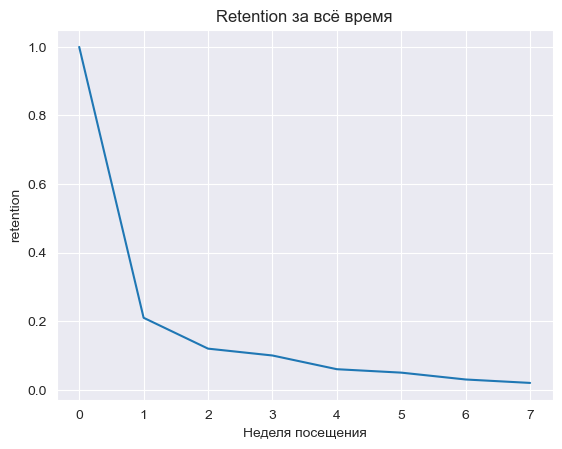

In [107]:
#считаем retention 7 недели
sns.lineplot(x = 'diff_week', y = "retention", data=cum_ret)
sns.set_style("darkgrid")
plt.xlabel("Неделя посещения")
plt.ylabel("retention")
plt.title('Retention за всё время')
plt.show()

In [108]:
print(f'Удержание на 7 неделю составляет {round(cum_ret.retention.iloc[-1] * 100, 2) } %')

Удержание на 7 неделю составляет 2.0 %


Видим, что самый большый отток происходит в первую неделю. Далее удержание близко к плато, но не выходит на него, значит пользователи не находят ценность в продукте. Стоит помнить, что это не полная картина, так как для 7ой недели у нас только одна когорта, тем не менее можем сказать, что это плохой показатель для новостной-образовательной платформы.

Посчитаем retention только по закрытым когортам, это значит, что мы смотрим только на тех пользователей, который прожили в продукте указанный срок. Этот подход более правильный так как на retention каждой недели влияет каждая когорта. В случае с retention 7 week, на него влияет только 1 когорта, 6 недели

In [109]:
#фильтруем только до когорты 9 недели, так как они полностью прожили 4 недели
cum_ret4 = df.query("reg_week <= 9 & diff_week <= 4").groupby(['diff_week'], as_index = False) \
                        .agg(count_user = ('user_id', 'nunique'))
cum_ret4['ret'] = cum_ret4['count_user'] / cum_ret4['count_user'].iloc[0]
cum_ret4

,diff_week,count_user,ret
0,0,1941,1.000000
1,1,761,0.392066
2,2,539,0.277692
3,3,463,0.238537
4,4,334,0.172076


In [110]:
print(f'Удержание 4 недели составляет {round(cum_ret4.ret.iloc[-1], 2) * 100} %')

Удержание 4 недели составляет 17.0 %


Это неплохой показатель. Но его необходимо растить, если мы хотим чтобы пользователи дольше оставались на нашей платформе

## Retention по когортам

In [111]:
#поcчитаем retention по когортам
coh = df.groupby(['reg_week', 'diff_week'], as_index = False) \
                        .agg(count_user = ('user_id', 'nunique')) \
                        .sort_values(['reg_week', 'diff_week'], ascending = [True, True])

coh['retention_rate'] = coh['count_user'] / coh.groupby(["reg_week"])["count_user"].transform("first")

coh['lifetime'] = coh.groupby('reg_week')['retention_rate'].cumsum()

In [112]:
coh_pivot_pt = coh.pivot(index = 'reg_week', columns='diff_week', values = 'retention_rate')
coh_pivot_pt

diff_week,0,1,2,3,4,5,6,7
reg_week,,,,,,,,
6,1.0,0.409739,0.298100,0.273159,0.178147,0.166271,0.149644,0.124703
7,1.0,0.387025,0.279642,0.228188,0.170022,0.143177,0.114094,NaN
8,1.0,0.387409,0.268765,0.205811,0.169492,0.174334,NaN,NaN
9,1.0,0.347280,0.217573,0.192469,0.158996,NaN,NaN,NaN
10,1.0,0.357616,0.231788,0.231788,NaN,NaN,NaN,NaN
11,1.0,0.360000,0.280000,NaN,NaN,NaN,NaN,NaN
12,1.0,0.276109,NaN,NaN,NaN,NaN,NaN,NaN
13,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


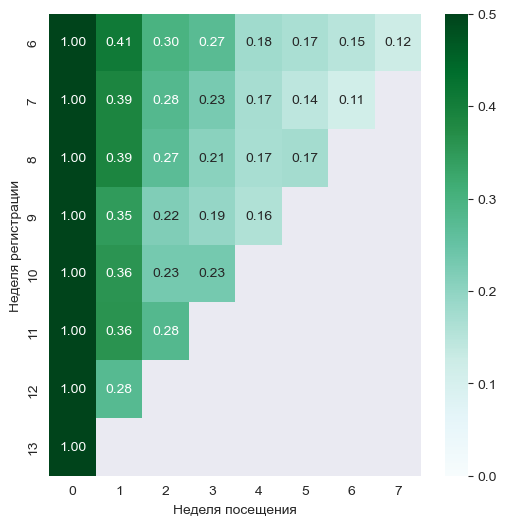

In [113]:
plt.figure(figsize = (6, 6))
sns.heatmap(data = coh_pivot_pt,
            annot = True,
            fmt = '.2f',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'BuGn')
plt.xlabel("Неделя посещения")
plt.ylabel("Неделя регистрации")
plt.show()

Мы видим, что самая успешная когорта 6 неделя, у неё самые высокие показатели Retention за каждую неделю.
Самая неудачная когорта - 12 неделя, в ней на первую неделю вернулось 28% пользователей, это на 7% меньше чем когорта 11 недели.

**В целом retention падает, особенно это заметно по retention 1 week, на 13% по сравнению с 6 когорты.**


Гипотезы: 
<br> 1. Поменялись источники траффика.
<br> 2. Плохо настроенный таргетинг (нецелевые пользователи/регионы).
<br> 3. Падает качество контента.
<br> 4. Одна из категорий становится не интересна пользователям.
          
Для проверки 1 и 2 гипотезы необходимо иметь данные об источниках трафика, рекламных компаниях, платформе и регионах пользователя. Для проверки 3ей гипотезы необходимы данные о дате публикации.  
Проверим гипотезу 4, посмотрев retention по категориям.

## Retention по категориям

In [114]:
#поcчитаем retention по когортам
df_ret_cat = df.groupby(['diff_week', 'category'], as_index = False) \
                        .agg(count_user = ('user_id', 'nunique')) \
                        .sort_values(['diff_week', 'category'], ascending = [True, True])

df_ret_cat['retention_rate'] = round( 
                    df_ret_cat['count_user'] / df_ret_cat.groupby(['category'])["count_user"].transform("first") * 100
                , 2)

df_ret_cat.query("category != 'start'", inplace = True)

fig = px.line(df_ret_cat,x = 'diff_week', y = 'retention_rate', 
                  color = 'category', title = "Retention Rate по категориям")

fig.update_layout(
    xaxis_title="Номер недели посещения",
    yaxis_title="Retention rate, %",
    title_x=0.5)

Из трёх самых популярных категорий (blog, video, course) у course самый большой retention на 1, 2, 3 неделю. Далее retention у этих трёх категорий выравнивается. Retention раздела read сильно скачет, но он почти всегда выше остальных категорий.

Посмотрим retention отдельно по каждой категории

Напишем для этого функцию

In [115]:
def ret_type(df, category):
    '''Фильтрует датафрейм по указанной категории и возвращает retention'''
    #фильтруем датафрейм только по необходимой категории
    coh = df[df['category'] == category].groupby(['reg_week', 'diff_week'], as_index = False) \
                        .agg(count_user = ('user_id', 'nunique')) \
                        .sort_values(['reg_week', 'diff_week'], ascending = [True, True])
    
    #считаем рутенш для каждой недели
    coh['retention_rate'] = coh['count_user'] / coh.groupby(["reg_week"])["count_user"].transform("first")
    
    return coh

In [116]:
coh_vid = ret_type(df, 'video')
coh_course = ret_type(df, 'course')
coh_blog = ret_type(df, 'blog')
coh_traj = ret_type(df, 'trajectory')
coh_read = ret_type(df, 'read')
coh_do = ret_type(df, 'do')

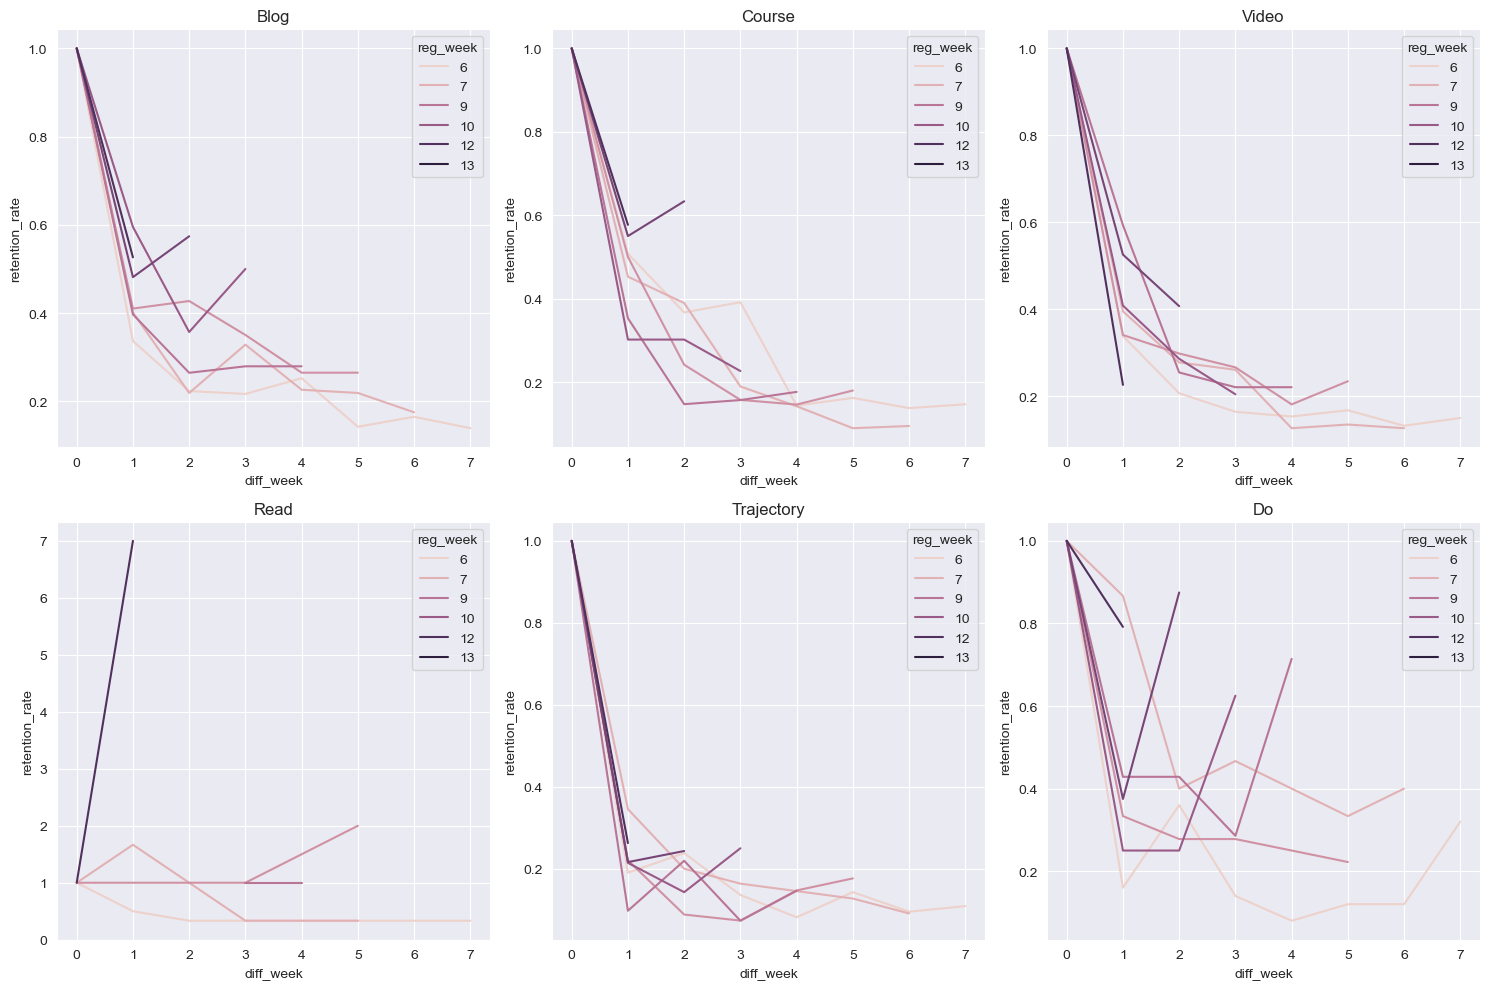

In [117]:
# Создаем сетку для 6 графиков
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Список данных и соответствующих названий для графиков
data_list = [coh_blog, coh_course, coh_vid, coh_read, coh_traj, coh_do]
titles = ['Blog', 'Course', 'Video', 'Read', 'Trajectory', 'Do']

for i, data in enumerate(data_list):
    row = i // 3
    col = i % 3
    
    sns.lineplot(data=data, 
                 x='diff_week', 
                 y='retention_rate', 
                 hue='reg_week',
                 ax=axs[row, col])
    axs[row, col].set_title(titles[i])

plt.tight_layout()
plt.show()

Retention 1 недели падает в разделе course и trajectory, возможно именно эти категори вызвали падение общего retention. Так же видим, что в разделе do и trajectory у многих когорт retention увеличивается в последнюю неделю. Возможно, эти разделы рекомендовали пользователям чаще всего в этот период.
<br> Метрика очень странно вёдет себя в разделе read, рассмотрим её внимательнее.

In [118]:
coh_read

,reg_week,diff_week,count_user,retention_rate
0,6,0,6,1.000000
1,6,1,3,0.500000
2,6,2,2,0.333333
3,6,4,2,0.333333
4,6,7,2,0.333333
5,7,0,3,1.000000
6,7,1,5,1.666667
7,7,3,1,0.333333
8,7,4,1,0.333333
9,7,5,1,0.333333


Такое странное поведение связано с тем, что в когорту 12 недели пришёл 1 человек, а через неделю пришло уже 7.

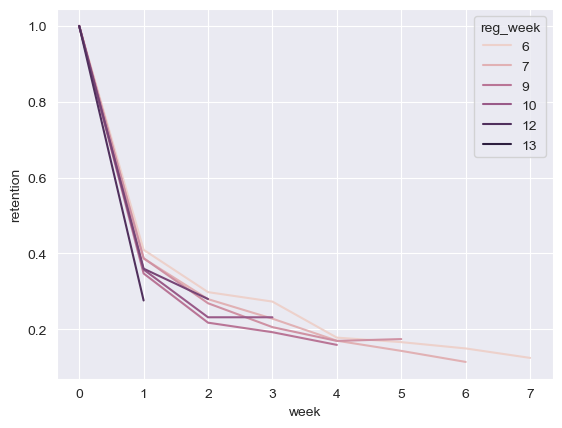

In [119]:
cum_ret_week = df.groupby(['reg_week', 'diff_week'], as_index = False) \
                        .agg(count_user = ('user_id', 'nunique'))

cum_ret_week['retention'] = ( cum_ret_week['count_user'] / 
                                 cum_ret_week.groupby(['reg_week'])['count_user'].transform('first') )

sns.lineplot(x = 'diff_week', y = "retention", hue = 'reg_week', data=cum_ret_week)
sns.set_style("darkgrid")
plt.xlabel("week")
plt.ylabel("retention")
plt.show()

Когорта 13 недели на 1 неделе показа самый маленьий retention. В целом, когорты ведут себя похоже. Но здесь мы опять видим, что когорта 6 недели самая успешная, почти на каждой неделе у неё самый высокий retention. Когорта 13 недели показывает самый маленький retention на 1 неделю

Попробуем проанализировать dynamic retention 7 day

In [142]:
def dyn_retention(df, days):
    '''Считает moving retention для dataframe с выбором дня'''
    dict_dates = {}
    list_for_df = []
    
    dates = df['visit_date'].unique()
    df_dyn_ret = pd.DataFrame(data = dates, columns = ['date'])
    df_dyn_ret['min_reg_date'] = df_dyn_ret - pd.Timedelta(days=days)
    
    #создаём словарь с датами
    for row in df_dyn_ret.itertuples():
        dict_dates[row.date] = df['user_reg_date'][df['user_reg_date'] <= row.min_reg_date].unique()
    
    #создаём словарь для df
    for key, value in dict_dates.items():
        for i in value:
            dict_dates_df = {}
            dict_dates_df['date'] = key
            dict_dates_df['coh_reg_date'] = i
            list_for_df.append(dict_dates_df)
                
    df_new = pd.DataFrame(data = list_for_df)
    
    #после того, как мы получили первые дни регистраций для каждой когорты, надо вычислить кол-во пользователей в эти дни
        
    df_new['0_day'] = df_new['coh_reg_date'].apply(lambda row: 
                    df['user_id'][(df['user_reg_date'] == row) & (df['visit_date'] == df['user_reg_date'])].nunique())
    
    #вычиляем количество пользователей для скользящего дня
    df_new['diff_day'] = df_new['coh_reg_date'].apply(lambda row: 
                df['user_id'][(df['user_reg_date'] == row) & (df['visit_date'] == row + pd.Timedelta(days = days))].nunique())
    
    #считаем сумму пользователей по когортам на день регистрации и на день скользящего ретеншн
    df_dyn_ret = df_new.groupby(['date'], as_index = False).agg(sum_0d_users = ('0_day', 'sum'), sum_diffd_users = ('diff_day', 'sum'))
    df_dyn_ret['dyn_ret'] = round( df_dyn_ret['sum_diffd_users'] / df_dyn_ret['sum_0d_users'] , 2)
    
    return df_dyn_ret

<AxesSubplot:xlabel='date'>

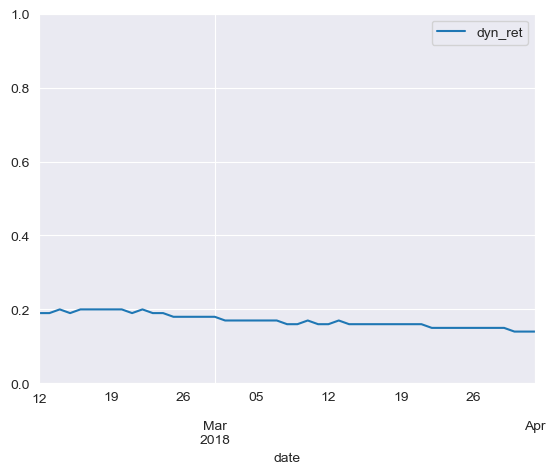

In [121]:
df_dynret_7 = dyn_retention(df, 7)
df_dynret_7.plot(x='date', y = 'dyn_ret', ylim = (0,1))

In [122]:
df_dynret_7.iloc[-1]

date               2018-04-01 00:00:00
sum_0d_users                      2423
sum_diffd_users                    332
dyn_ret                           0.14
Name: 48, dtype: object

Ретеншн 7го дня падает. 1 апреля он снизился на 6% по сравнению с 12 февраля.

Посмотрим retention 30 дня

<AxesSubplot:xlabel='date'>

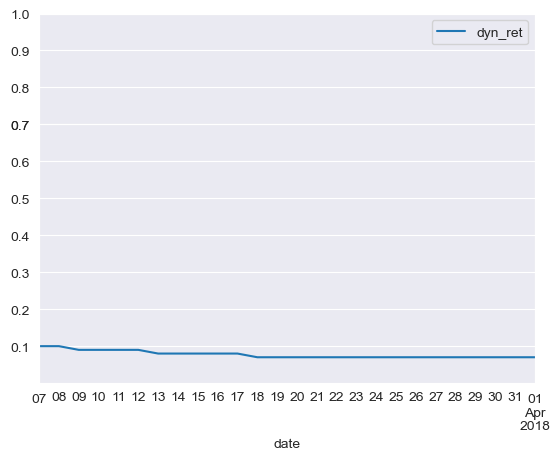

In [123]:
df_dynret_30 = dyn_retention(df, 30)
df_dynret_30.plot(x='date', y = 'dyn_ret', ylim = (0,1), yticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7,0.8, 0.9, 1])

In [124]:
df_dynret_30.iloc[-1]

date               2018-04-01 00:00:00
sum_0d_users                      1429
sum_diffd_users                    105
dyn_ret                           0.07
Name: 25, dtype: object

Retention 30 дня с 7 марта упал на 3%

Выводы:
1. Общий retention падает
2. Наблюдается тенденция снижения retention для разделов course и trajectory.
3. Раздел course показывает наилучшие показатели retention по сравнению с другими типами контента, особенно в первые три недели. Это говорит о том, что пользователи находят курсы наиболее ценными и возвращаются к ним чаще.
4. Раздел video имеет самый низкий retention rate, особенно после первой недели. Возможно, контент этого раздела недостаточно привлекателен или не отвечает потребностям пользователей в долгосрочной перспективе.

# Custom metrics
## Среднее кол-во категорий в неделю, которые смотрит пользователь
Проверим гипотезу о том, что чем больше пользователей посмотрел категорий за неделю, тем более вероятно, что он останется на платформе

In [125]:
#напишем запрос, который вернет неделю, пользователя и кол-во его категорий
df_user_cat = df.query("category != 'start'") \
                        .groupby(['diff_week', 'last_diff_week', 'user_id'], as_index = False) \
                        .agg(count_cat = ('category', 'nunique'))
df_user_cat

,diff_week,last_diff_week,user_id,count_cat
0,0,0,5925,1
1,0,0,5926,1
2,0,0,5928,1
3,0,0,5929,1
4,0,0,5932,2
...,...,...,...,...
7552,7,7,8685,1
7553,7,7,8722,1
7554,7,7,8752,1
7555,7,7,8761,1


<AxesSubplot:title={'center':'Среднее кол-во категорий в неделю на пользователя'}, xlabel='Неделя посещения', ylabel='Кол-во категорий'>

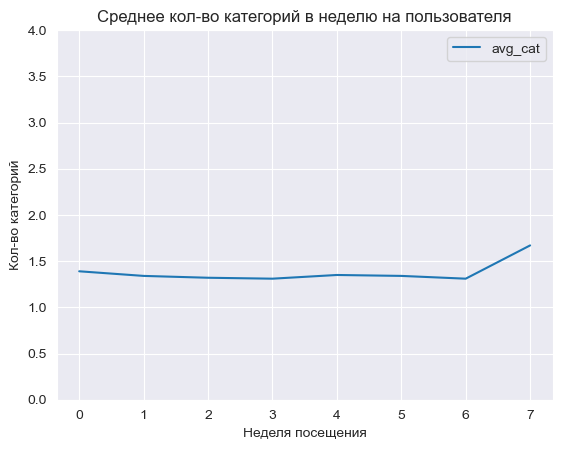

In [126]:
df_user_cat_week = df_user_cat.groupby(['diff_week'], as_index = False) \
                        .agg(avg_cat = ('count_cat','mean')).round(2)

df_user_cat_week.plot( x = 'diff_week', ylim= (0,4), ylabel = 'Кол-во категорий', 
            xlabel = 'Неделя посещения', title = 'Среднее кол-во категорий в неделю на пользователя')

В среднем в неделю каждый пользователь смотрит 1.3-1.4 категории. На 7 неделю пользователи начинают смотреть на 0.5 категорий в неделю больше

In [127]:
#разделим оставшихся и ушедших пользователей
avgcat_list = []
max_week = df['diff_week'].max()
for i in range(0, max_week + 1):
    if i != max_week:
        avg_cat = round( 
            df_user_cat['count_cat'][(df_user_cat['diff_week'] == i) & (df_user_cat['last_diff_week'] != i)].mean() 
            , 2)
        
        avg_cat_ch = round( 
            df_user_cat['count_cat'][(df_user_cat['diff_week'] == i) & (df_user_cat['last_diff_week'] == i)].mean() 
            , 2)
    else:
        avg_cat = avg_cat_ch = round( df_user_cat['count_cat'][(df_user_cat['diff_week'] == i) & (df_user_cat['last_diff_week'] == i)].mean() , 2)
        avg_cat_ch = None
    avgcat_list.append([i, avg_cat, avg_cat_ch])
    
df_avgcat = pd.DataFrame(avgcat_list, columns = ["week_number", "remain_users", "churn_users"])

<AxesSubplot:title={'center':'Среднее кол-во категорий на пользователя в неделю c разделением по пользователям'}, xlabel='Неделя посещения', ylabel='Кол-во категорий'>

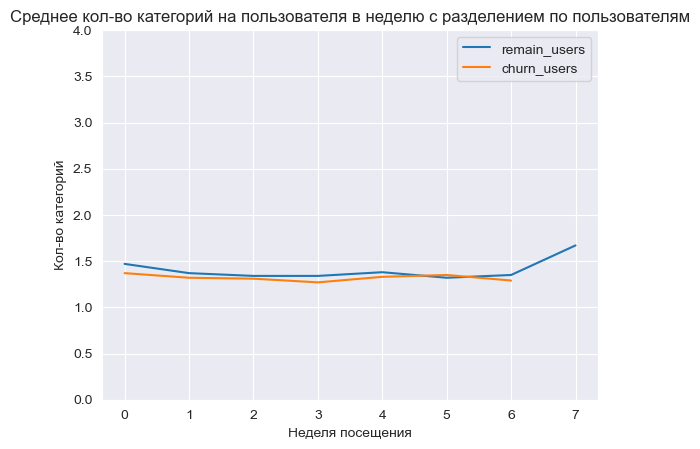

In [128]:
df_avgcat.plot(x= 'week_number', 
            title = "Среднее кол-во категорий на пользователя в неделю c разделением по пользователям", 
            ylabel = 'Кол-во категорий', xlabel = 'Неделя посещения',
           ylim = (0,4))

В период с 0 по 7 неделю наши оставшиеся пользователи в среднем смотрят 1.4 категории. В 7 неделю, показатель резко пошёл вверх. 

Корреляции между кол-вом категорий в неделю и lifetime, нет.

## Среднее кол-во категорий, которые посмотрел пользователь в зависимости от времени жизни пользователя

In [129]:
df_lt_cat = df.query("category != 'start'").groupby(['last_diff_week', 'user_id'], as_index = False).agg(count_cat = ('category', 'nunique'))

In [130]:
avglife_list = []
for i in range(0, 8):
    avg_cat = round( df_lt_cat['count_cat'][df_lt_cat['last_diff_week'] == i].mean() , 2)
    avglife_list.append([i, avg_cat])

In [131]:
df_avgcatli = pd.DataFrame(avglife_list, columns = ["last_diff_week", "avg_cat_per_user"])

<AxesSubplot:title={'center':'Среднее кол-во категорий пользователя по времени жизни'}, xlabel='Последняя неделя посещения', ylabel='Кол-во категорий'>

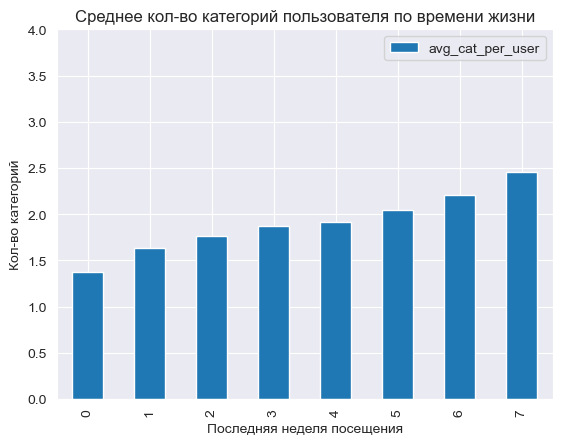

In [132]:
df_avgcatli.plot(x = 'last_diff_week', 
                 title = "Среднее кол-во категорий пользователя по времени жизни", 
                 ylim = (0,4), kind = 'bar', ylabel = 'Кол-во категорий', xlabel = 'Последняя неделя посещения')

Пользователи, которые не ушли спустя 7 недель, за весь lifetime посмотрели в среднем около 2.5 категории.
<br> Наблюдаем прямую корреляцию между временем ухода из платформы и просмотренными категориями .

## Доля пользователей за неделю, которые посмотрели все категории.

<AxesSubplot:title={'center':'Доля пользователей за неделю, которые смотрели все категории'}, xlabel='Неделя посещения', ylabel='Доля пользователей'>

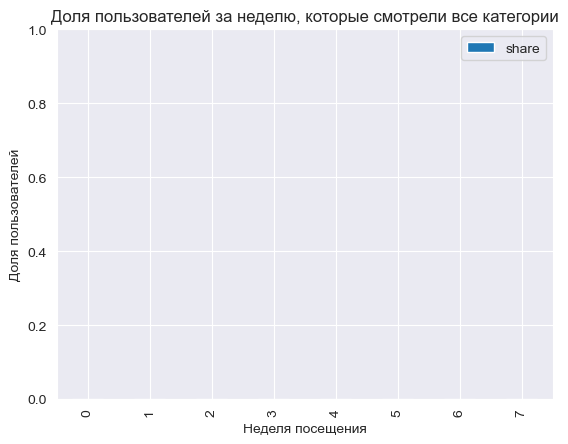

In [133]:
df_user_cat['all_cat'] = df_user_cat['count_cat'] == numb_of_cat
df_all_cat = df_user_cat.groupby(['diff_week'], as_index = False).agg(share = ('all_cat', 'mean')).round(2)
df_all_cat.plot(x = 'diff_week', ylim = (0,1), kind = 'bar', ylabel = 'Доля пользователей', 
                xlabel = 'Неделя посещения', title = 'Доля пользователей за неделю, которые смотрели все категории')

Таких пользователей нет

## Доля пользователей за неделю, которые смотрели не менее 3х категорий (половину)

<AxesSubplot:title={'center':'Доля пользователей за неделю, которые смотрели не менее 3х категорий'}, xlabel='Неделя посещения', ylabel='Доля пользователей'>

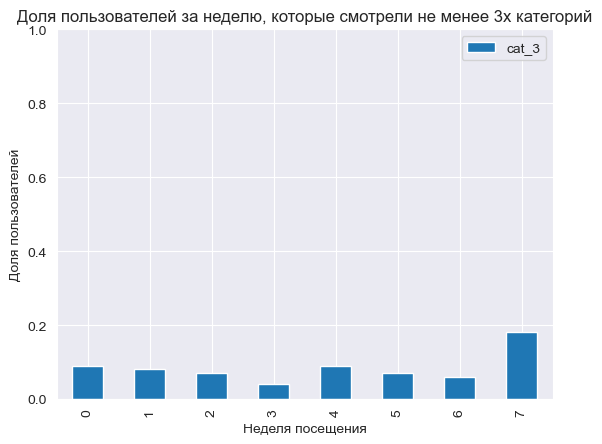

In [134]:
df_user_cat['3_cat'] = df_user_cat['count_cat'] >= numb_of_cat / 2

df_half_cat = df_user_cat.groupby(['diff_week'], as_index = False) \
                        .agg(cat_3 = ('3_cat', 'mean')).round(2)

df_half_cat.plot(x = 'diff_week', ylim = (0,1), kind = 'bar',
                ylabel = 'Доля пользователей', xlabel = 'Неделя посещения', 
                 title = 'Доля пользователей за неделю, которые смотрели не менее 3х категорий')

Доля пользователей, которые смотрят в неделю 3 и более категорий в последнюю неделю растёт

## Доля пользователей, которые посмотрели все категории за всё время, в зависимости от недели ухода пользователя.

<AxesSubplot:title={'center':'Доля пользователей по неделе ухода, которые посмотрели 6 категорий за всё время'}, xlabel='Последняя неделя посещения', ylabel='Доля пользователей'>

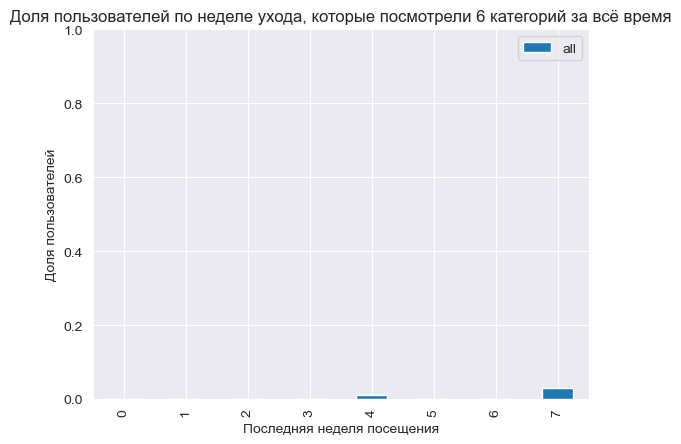

In [135]:
df_lt_cat = df.query("category != 'start'") \
                    .groupby(['last_diff_week', 'user_id'], as_index = False) \
                    .agg(cnt_cat = ('category','nunique'))

df_lt_cat['all_cat'] = df_lt_cat['cnt_cat'] == numb_of_cat

df_lt_all_cat = df_lt_cat.groupby('last_diff_week', as_index = False).agg(all = ('all_cat','mean')).round(2)

df_lt_all_cat.plot(x='last_diff_week', ylim = (0,1), kind = 'bar',
                ylabel = 'Доля пользователей', 
                xlabel = 'Последняя неделя посещения', 
                title = 'Доля пользователей по неделе ухода, которые посмотрели 6 категорий за всё время')

Практически нет пользователей, которые смотрели все категории за всё время

Доля пользователей, которые посмотрели половину категорий за всё время, в зависимости от недели ухода пользователя.

<AxesSubplot:title={'center':'Доля пользователей по неделе ухода, которые посмотрели не мене 3х категорий за всё время'}, xlabel='Последняя неделя посещения', ylabel='Доля пользователей'>

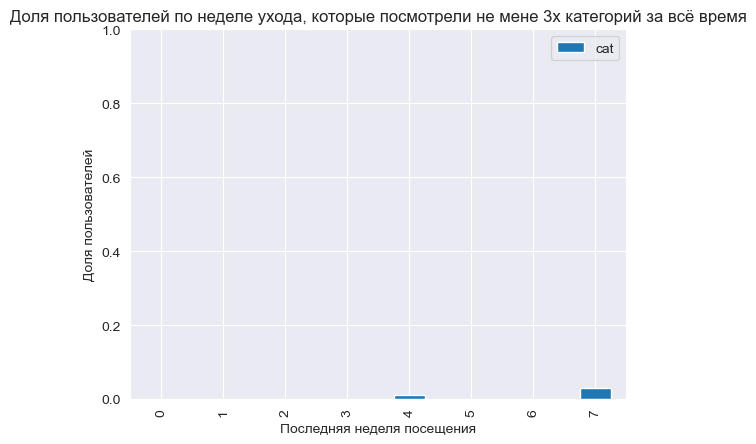

In [136]:
df_lt_cat = df.query("category != 'start'") \
                .groupby(['last_diff_week', 'user_id'], as_index = False) \
                .agg(cnt_cat = ('category','nunique'))

df_lt_cat['3_cat'] = df_lt_cat['cnt_cat'] >= numb_of_cat

df_lt_3_cat = df_lt_cat.groupby('last_diff_week', as_index = False) \
                    .agg(cat = ('3_cat','mean')).round(2)

df_lt_3_cat.plot(x='last_diff_week', ylim = (0,1), kind = 'bar',
                ylabel = 'Доля пользователей', 
                xlabel = 'Последняя неделя посещения', 
                title = 'Доля пользователей по неделе ухода, которые посмотрели не мене 3х категорий за всё время')

Почти 40% пользователей ушедших на 6 неделе или остались, смотрели не менее 3х категорий за всё время

## Доля пользователей, которые смотрят категории

In [137]:
df_cat = df.query("category != 'start'").groupby(['diff_week', 'category'], as_index = False) \
                        .agg(count_user = ('user_id','nunique'))

df_wau = df.groupby(['diff_week'], as_index = False) \
                .agg(count_user = ('user_id','nunique'))

df_merge = df_cat.merge(df_wau, how = 'left', on = 'diff_week', suffixes = ("","_wau"))

df_merge['Share, %'] = round(df_merge['count_user'] / df_merge['count_user_wau'] * 100 , 2)

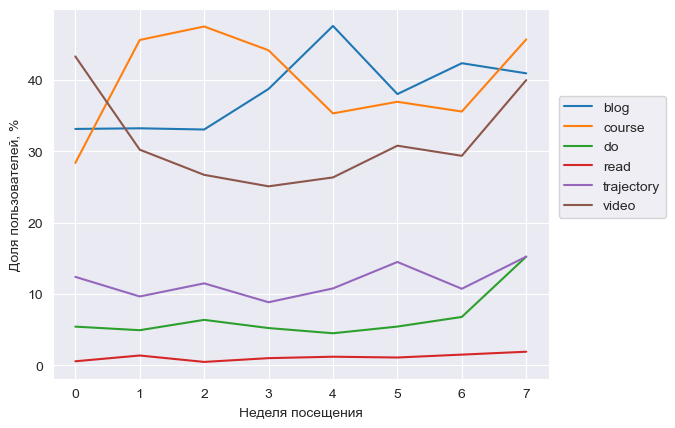

In [138]:
sns.lineplot(x = "diff_week", y = "Share, %", data=df_merge, hue = 'category')
sns.set_style("darkgrid")
plt.xlabel("Неделя посещения")
plt.ylabel("Доля пользователей, %")
plt.legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
plt.show()

Повышение на последней неделе, говорит о том, что оставшиеся пользователи смотрят сразу весь контент. От 1-3% пользователей смотрят раздел "read", это очень мало.

## Среднее кол-во страниц в неделю на пользователя

In [139]:
df_user_page = df.groupby(['diff_week', 'last_diff_week', 'user_id'], as_index = False) \
                                        .agg(count_page = ('URL_visited','count'))

In [140]:
#разделим пользователей на ушедших и оставшихся
avgpage_list = []
max_week = df['diff_week'].max()

for i in range(0, max_week + 1):
    
    if i != max_week:
        avg_page = round( df_user_page['count_page'][(df_user_page['diff_week'] == i) & (df_user_page['last_diff_week'] != i)].mean() , 2)
        avg_page_ch = round( df_user_page['count_page'][(df_user_page['diff_week'] == i) & (df_user_page['last_diff_week'] == i)].mean() , 2)
    
    else:
        avg_page = round( df_user_page['count_page'][(df_user_page['diff_week'] == i) & (df_user_page['last_diff_week'] == i)].mean() , 2)
        avg_page_ch = None
    avgpage_list.append([i, avg_page, avg_page_ch])
    
df_avgpage = pd.DataFrame(avgpage_list, columns = ["week_number", "remain_users", "churn_users"])

<AxesSubplot:title={'center':'Среднее кол-во страниц в неделю на пользователя'}, xlabel='Неделя посещения', ylabel='Кол-во страниц'>

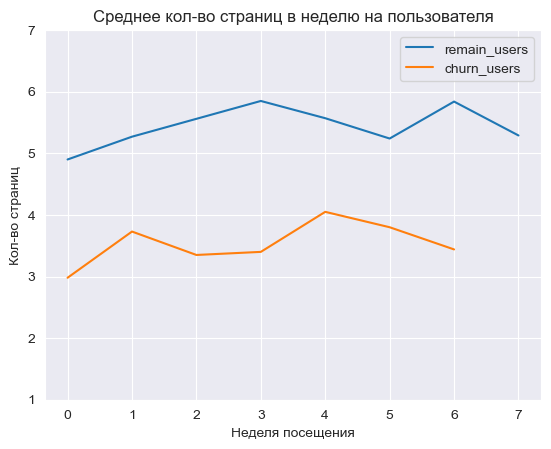

In [141]:
df_avgpage.plot(x = 'week_number', ylim = (1, 7), xlabel = 'Неделя посещения', ylabel = 'Кол-во страниц',
               title = 'Среднее кол-во страниц в неделю на пользователя')

Оставшиеся пользователи всегда смотрят больше контента, чем оставшиеся. У них большая глубина просмотра

# Вывод


**MAU, WAU, DAU.**
<br> WAU 10 недели было самое маленькое, так как в эту неделю было 2 праздничных дня. В 13 неделю пришло много новых пользователей, за счёт чего вырос MAU Марта, WAU 13 недели и DAU этой недели.

**Популярные разделы.**
<br> Самыми популярными разделами является 'course', 'blog', 'video'. За всё время каждый из них просмотрели более 2000 пользователей, раздел read самый непопулярный, его просмотрели только 58 человек. Возможно, есть похожие разделы, например blog, который лучше закрывает потребности пользователей.

**Lifetime.**
<br> За 8 недель жизни платформы средний Lifetime составил 1.6 недель, это достаточно мало, необходимо растить этот показатель.


**Retention.**
<br> Наблюдается падение retention на всех неделях. Можем разделить это падение на 2 периода. Первый с когорты 6 недели по 11 неделю, второй на когорту 12 неделю, в первом периоде retention падал плавно в пределах 1-3%, а на втором, аж на 8%.
Во втором периоде(когорта 12 недели) пришло почти в 3 раза больше пользователей, по сравнению с предыдущей неделей, что могло сказаться на retention.

Общего падения retention в категориях не наблюдается, но оно есть в категориях course и trajectory, что могло повлиять на педение retention на первом этапе, описанном выше.

Retention 7 недели составляет всего 2%, что достаточно мало. Retention не выходит на плато, что говорит о том, что пользователи не находят ценности данной платформы.

**Custom metrics.**
<br> Ушедшие и оставшиеся пользователи смотрят одинаковое кол-во категорий в неделю, примерно 1.4, но оставшиеся пользователи в среднем в неделю смотрят на 2 страницы больше, то есть у осташихся пользователей, всегда больше глубина просмотра, об этом нам говорит метрика просмотр страниц на 1 пользователь. Важно сказать, что чем больше пользователь остаётся на платформе, тем больше категорий начинает смотреть.

**Каких данных не хватает**
1. О дате и теме публикации. Мы бы проанализировали структуру популярных материалов и узнали, что делает их более привлекательными для пользователей и что их отталкивает.
2. Источники трафика. Для понимания какие каналы более эффективны, и с каких каналов приходили пользователи на 13 неделю.

**Рекомедации**

1. **Ввести систему оценки материала.** <br> Дать пользователю возможность оценивать материал (понравилось/непонравилось). Таким образом, мы сможем понимать какой материал пользователям не нравится, и отслеживать пользователей, кототрые могут потенциально уйти из платформы. Также это поможет узнать, что делает материалы более привлекательными для каждого раздела. <br> Данное изменение позволит увеличить retention и dau, благодаря тому, что качество контента станет лучше.

2. **Ввести рекомендательную систему "Вам может понравится"**. <br> Она будет рекомедновать материалы подобные тем, которые понравились пользователю. <br> Данное изменение позволит увеличить retention и dau, благодаря тому, что пользователи буду сразу находить интересные для себя темы и читать больше конента.

3. **Приглашать пользоватей из других разделов в раздел course.** <br> Например, пользователь посмотрел видео по тематике "торговля в интернете" на нашей платформе, приглашаем его на наш курс, который посвещен этой теме. <br> Так как в этом разделе самый большой retention, приглашая пользователя в него, мы будем понимать, что пользователь может там задержаться и общий retention вырастит.  

4. **Ввести онбординг пользователя и отслеживать метрики в нём.** <br> На этом этапе мы доносим до пользователям наши основные фишки и преимущества, нам также необходимо понимать, с какими сложностями сталкивается пользователь при знакомстве с приложением. Этим изменением мы сможем увеличить retention первой недели и снизить отток пользователей. Метриками того что онбординг помогает, может также служить retention 7 дней, срденее кол-во просмотренных страниц на пользователя, после введения онбординга эти показатели должны увеличиться